## Part 1 - Data Analysis and Bayes Nets

### Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import random

Loading only the training set for Part 1 of the coursework

In [7]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)

    return x_train_all, y_train_all

In [8]:
x_train, y_train = load_train_data()

Analysing the dataset

In [9]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [10]:
y_train.shape

(9690, 1)

In [11]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [12]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [14]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [15]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [16]:
y_train.isna().any().any()

False

In [17]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [18]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [19]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: count, dtype: int64

Visualising the dataset using graphs

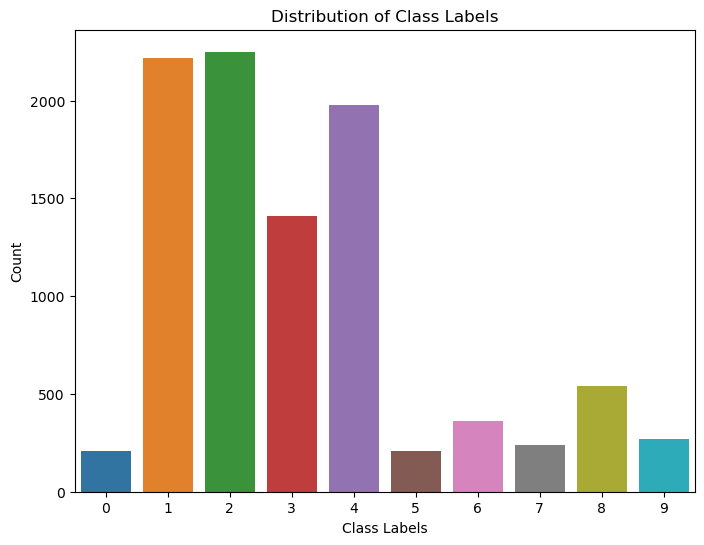

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

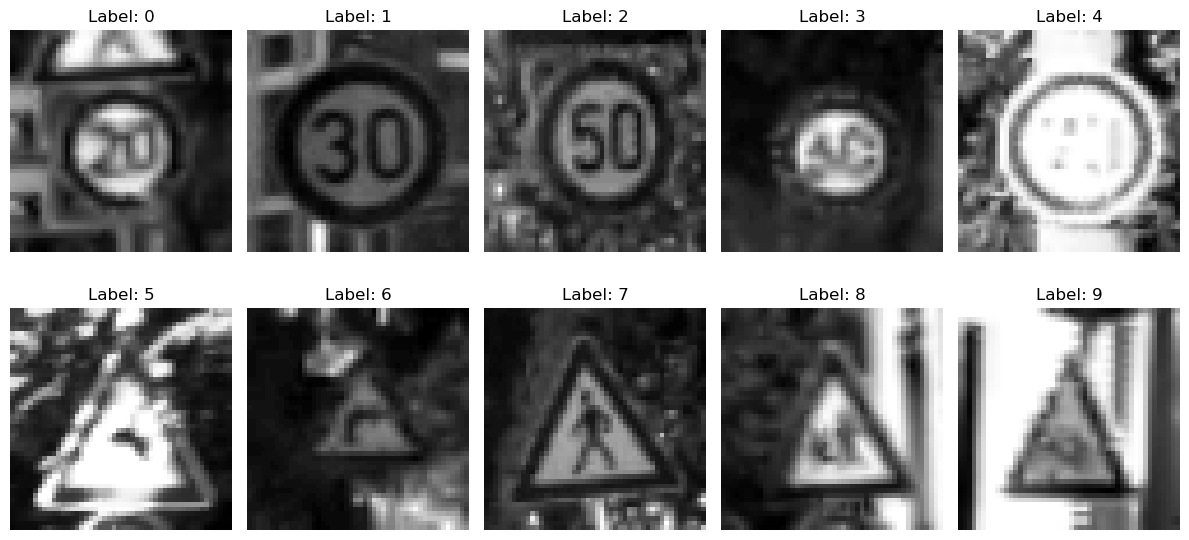

In [21]:
# To display one image for each label

# Initialize a dictionary to store one image for each label
label_images = {}

# Iterate through the rows of the DataFrames and find one image for each label
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        # Store the first image for each unique label
        label_images[label] = row.values.reshape(48, 48)  
    
    # Break the loop if we have found one image for each unique label
    if len(label_images) == 10:
        break

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image, cmap='gray')
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

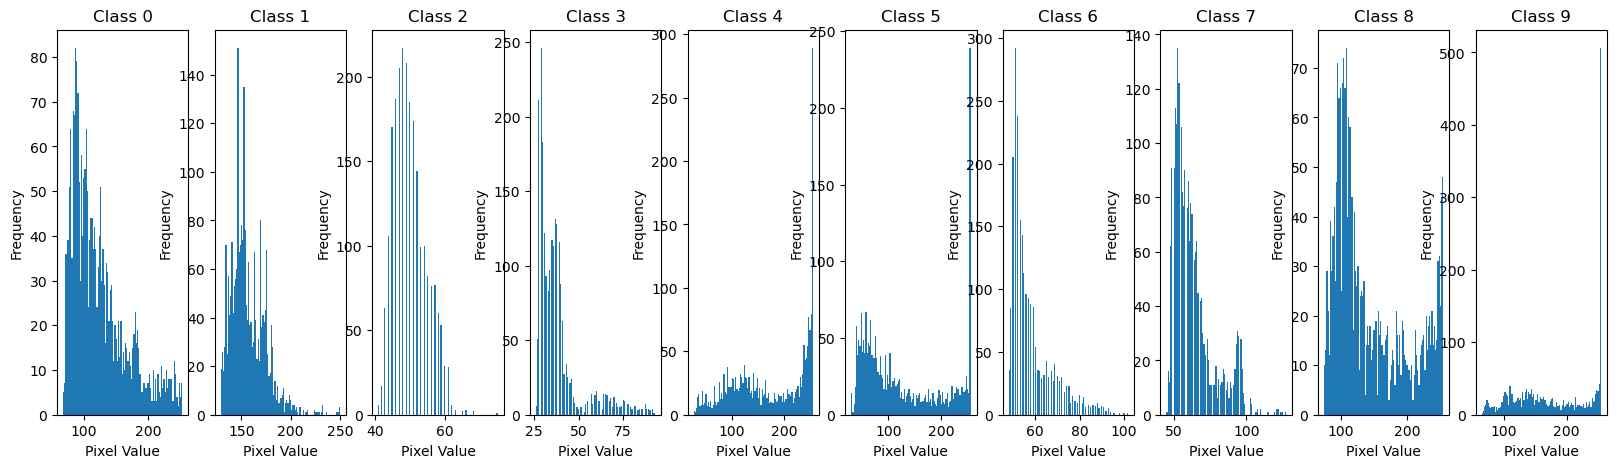

In [22]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select a representative image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        representative_image = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the representative image of each class
        axes[i].hist(representative_image, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()


### Pre-processing and Normalisation

#### Reshaping

In [23]:
def normalized_images(image):
    image = image /255.0
    image = image.values.reshape(-1, 48, 48)
    return image    

train_images = normalized_images(x_train)

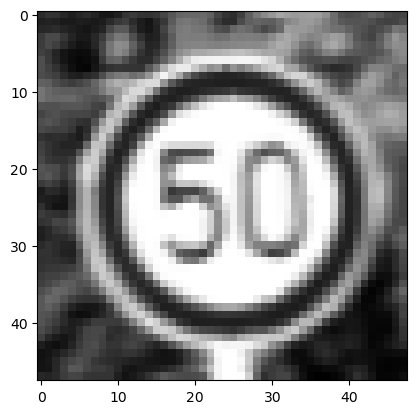

In [24]:
##CONFIRMING
example_image = train_images[4235] 
plt.imshow(example_image, cmap='gray')
plt.show()

In [25]:
number = len(x_train)

random_number = random.randint(0, number -1)

array = x_train.iloc[random_number]

ra_image = array.to_numpy()
height = 48
width = 48
channels = 1
image = ra_image.reshape(height, width, channels)
image = image/255.0


<function matplotlib.pyplot.show(close=None, block=None)>

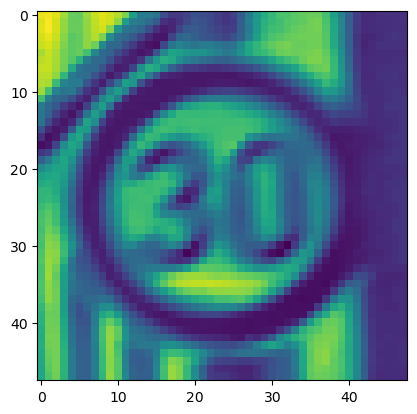

In [26]:
plt.imshow(image)
plt.show

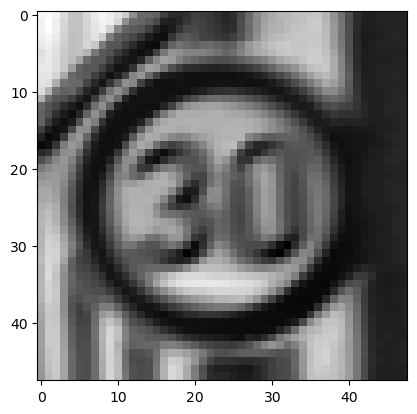

In [27]:
plt.imshow(image, cmap='gray')

#### Thresholding

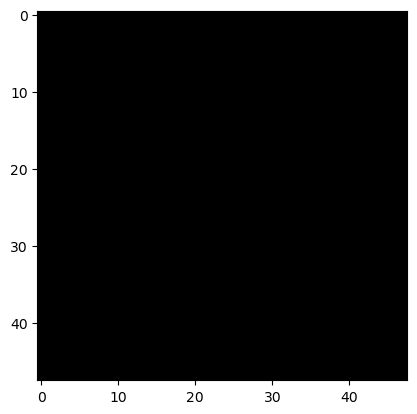

In [28]:
ret, thresh1 = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

#### Noise Reduction

Text(0.5, 1.0, 'smoothing with Gaussian sigma=7')

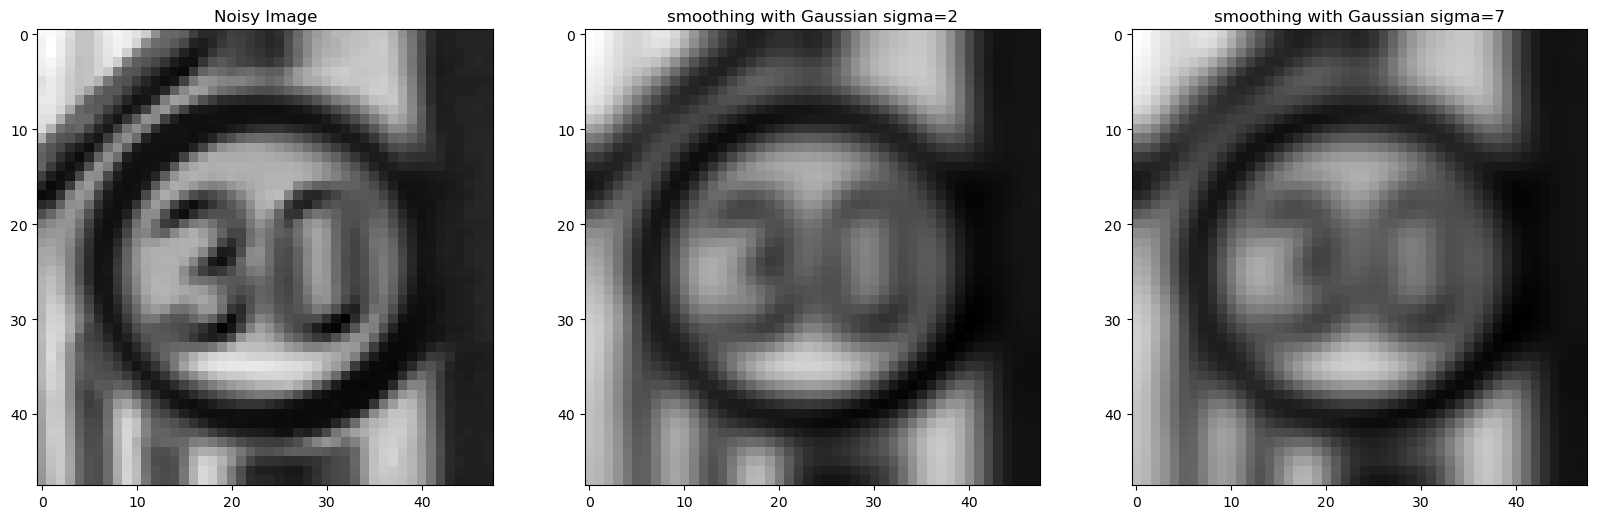

In [29]:
gaussian_blur1 = cv2.GaussianBlur(image,(5,5),2,cv2.BORDER_DEFAULT)
gaussian_blur2 = cv2.GaussianBlur(image,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(image,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

In [30]:
if image.shape[2] == 1:
     # The image is already grayscale, no need to convert
     image = image.astype(np.uint8)  # Convert to 8-bit single-channel
else:
     # Convert to grayscale
     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     image = image.astype(np.uint8) 

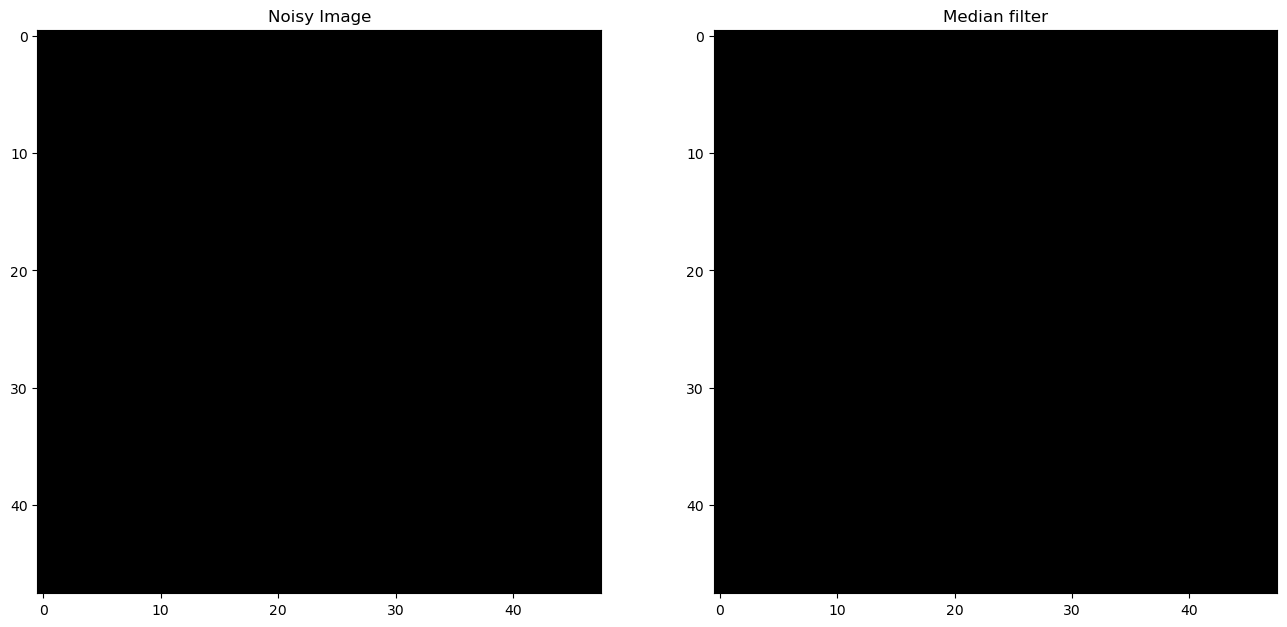

In [31]:

median = cv2.medianBlur(image,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

#### Otsu's Threshold

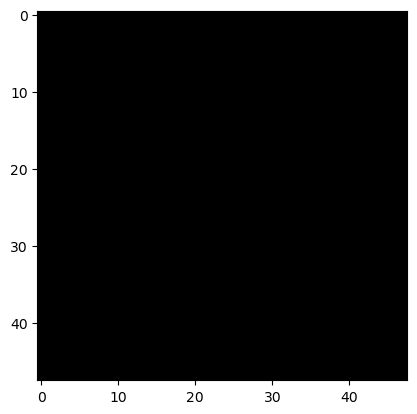

In [32]:
ret2, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap='gray')

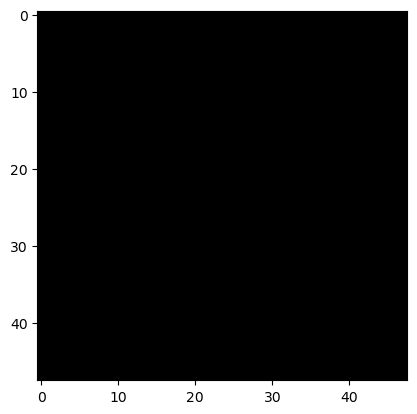

In [33]:
blur = cv2.GaussianBlur(image, (5,5),0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3, cmap='gray')

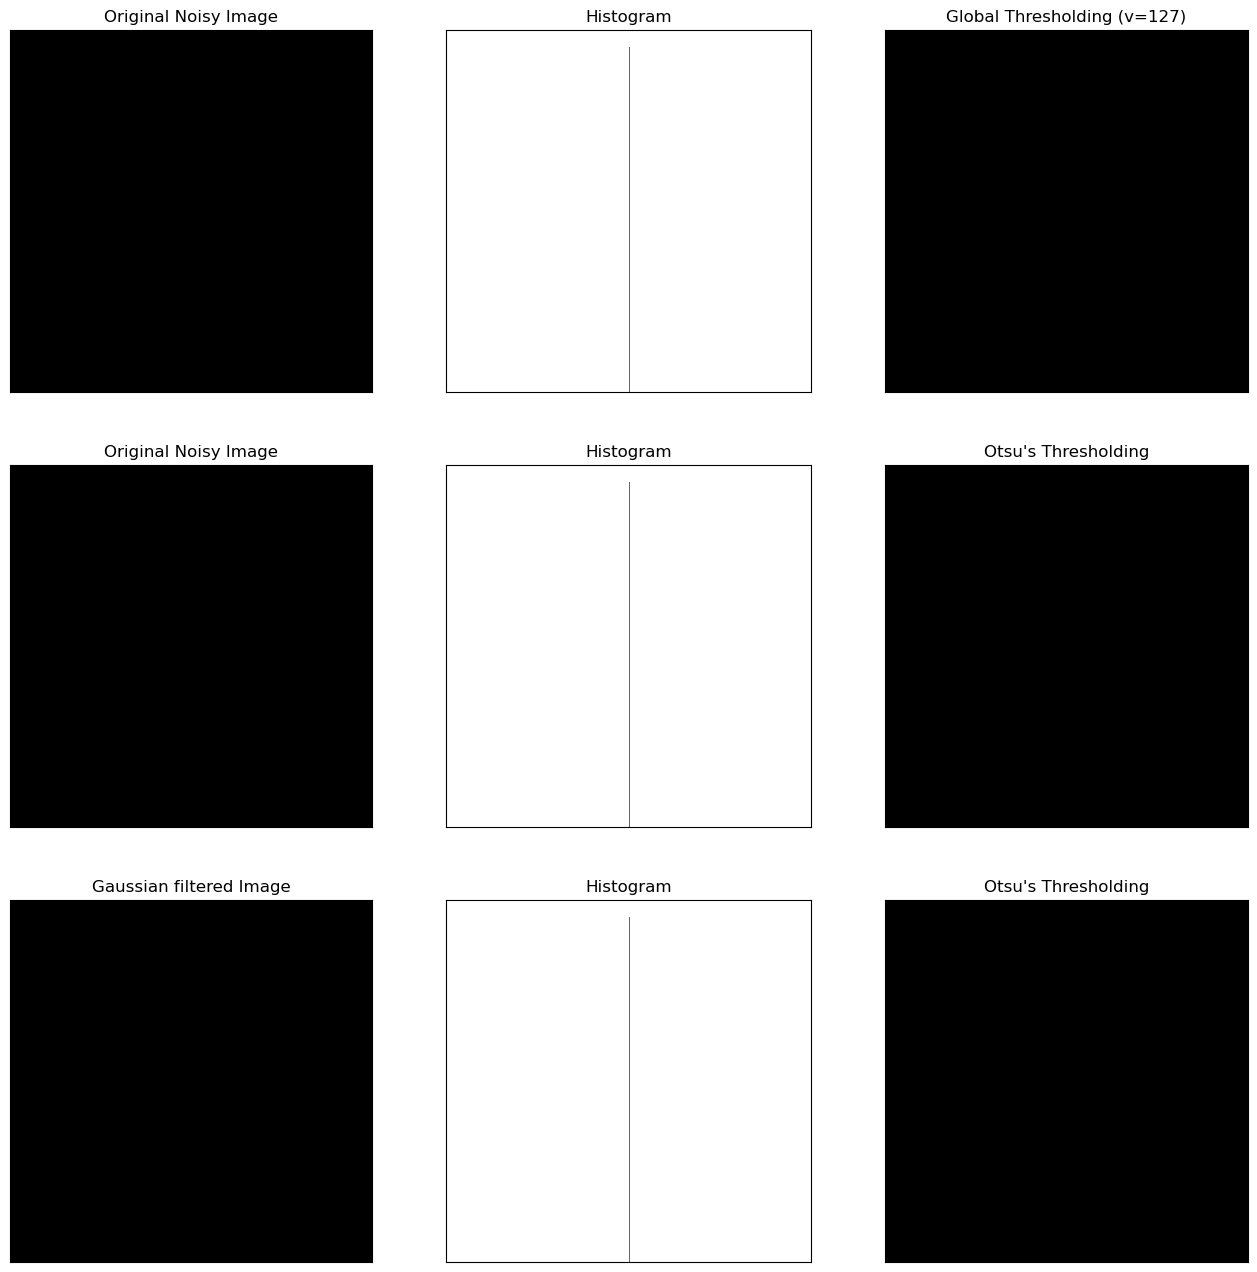

In [34]:
plt.figure(figsize=(16,16))
ret1,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
 # Otsu's thresholding
ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 # Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 # plot all the images and their histograms
images = [image, 0, th1,
           image, 0, th2,
           blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
           'Original Noisy Image','Histogram',"Otsu's Thresholding",
           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

#### Canny Edge Detection

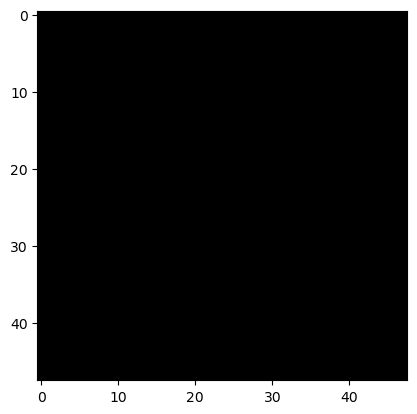

In [35]:


import math
#Hough Line Transform
dst = cv2.Canny(image, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# Draw the lines
if lines is not None:
     for i in range(0, len(lines)):
         rho = lines[i][0][0]
         theta = lines[i][0][1]
         a = math.cos(theta)
         b = math.sin(theta)
         x0 = a * rho
         y0 = b * rho
         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
         cv2.line(dst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
plt.imshow(cdst)

In [36]:
CW_DATASET_PATH = "CW_dataset"

def load_test_data(dataset_path=CW_DATASET_PATH):
    x_test_all_path = os.path.join(dataset_path, "x_test_all.csv")
    y_test_all_path = os.path.join(dataset_path, "y_test_all.csv")

    x_test_all = pd.read_csv(x_test_all_path)
    y_test_all = pd.read_csv(y_test_all_path)

    return x_test_all, y_test_all

x_test, y_test = load_test_data()

In [37]:

from sklearn.naive_bayes import GaussianNB

train_images = train_images.reshape(train_images.shape[0], -1)
clf2 = GaussianNB()
clf2.fit(train_images, y_train)

predictions2 = clf2.predict(x_test)


"""
#Using the stratified train test split to split the data into train and test sets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
train_images = train_images.reshape(train_images.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, Y_train)
predictions2 = clf2.predict(X_test)
"""

c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


'\n#Using the stratified train test split to split the data into train and test sets\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import train_test_split\ntrain_images = train_images.reshape(train_images.shape[0], -1)\nX_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)\nclf2 = GaussianNB()\nclf2.fit(X_train, Y_train)\npredictions2 = clf2.predict(X_test)\n'

In [38]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions2)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.31      0.58      0.41       720
           2       0.36      0.05      0.09       750
           3       0.30      0.05      0.09       450
           4       0.34      0.18      0.23       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.10      0.85      0.19       150
           9       0.00      0.00      0.00        90

    accuracy                           0.23      3090
   macro avg       0.14      0.17      0.10      3090
weighted avg       0.28      0.23      0.19      3090



c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions2)
confusion_matrix

array([[  0,  39,   4,   0,   9,   0,   0,   0,   8,   0],
       [  0, 421,  41,   0,  16,   0,   0,   0, 242,   0],
       [  0, 382,  37,  19, 140,   0,   0,   0, 172,   0],
       [  0, 146,   3,  23,  26,   0,   0,   0, 252,   0],
       [  0, 249,   3,  35, 116,   0,   0,   0, 257,   0],
       [  0,   6,   0,   0,  15,   0,   0,   0,  39,   0],
       [  0,  30,  12,   0,   3,   0,   0,   0,  45,   0],
       [  0,  23,   0,   0,  14,   0,   0,   0,  23,   0],
       [  0,  12,   4,   0,   6,   0,   0,   0, 128,   0],
       [  0,  34,   0,   0,   0,   0,   0,   0,  56,   0]], dtype=int64)

In [40]:
specificity = []
unique_labels = np.unique(y_train)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 1.0
Label 1 specificity: 0.6113924050632912
Label 2 specificity: 0.9713675213675214
Label 3 specificity: 0.9795454545454545
Label 4 specificity: 0.905761316872428
Label 5 specificity: 1.0
Label 6 specificity: 1.0
Label 7 specificity: 1.0
Label 8 specificity: 0.6278911564625851
Label 9 specificity: 1.0


In [41]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_test, predictions2, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.0
Label 1 sensitivity: 0.5847222222222223
Label 2 sensitivity: 0.04933333333333333
Label 3 sensitivity: 0.051111111111111114
Label 4 sensitivity: 0.17575757575757575
Label 5 sensitivity: 0.0
Label 6 sensitivity: 0.0
Label 7 sensitivity: 0.0
Label 8 sensitivity: 0.8533333333333334
Label 9 sensitivity: 0.0


c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


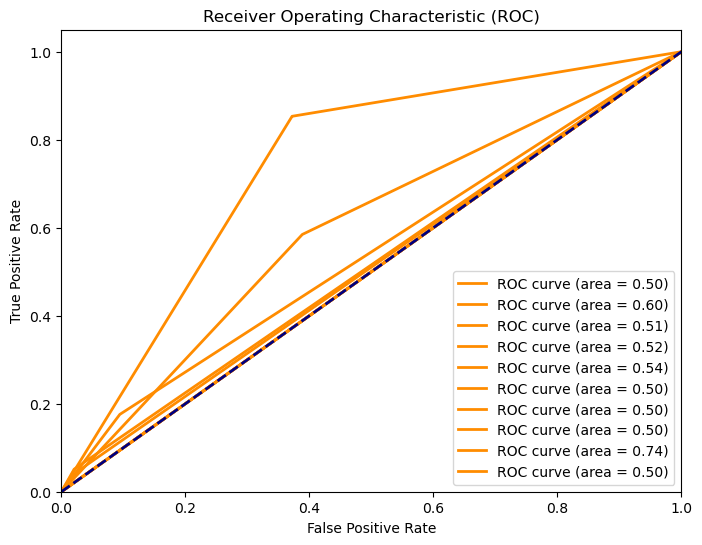

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf2.predict_proba(x_test)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((y_test == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()